# Library

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

from scipy.stats import kruskal

# Data

In [69]:
car_models = ['audi', 'bmw', 'cclass', 'focus', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']
df = pd.DataFrame()

for i in car_models:
    carmodel_df = pd.read_csv('dataset/'+i+'.csv')
    if i == 'hyundi':
        carmodel_df = carmodel_df.rename(columns={'tax(£)': 'tax'})

    df = pd.concat([df, carmodel_df])
    

In [3]:
# reset ulang index, karena index masih menggunakan index dataframe sebelum digabung
df = df.reset_index()

In [4]:
# drop index lama
df = df.drop(columns='index')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


- mpg = miles per gallon, more mpg means better fuel economy 
- engine size = the measure of the cylinder volume swept by all of the pistons (cubic inches). increased engine displacement means produce more power, but can burn more fuel

# EDA

## Deskripsi Statistik

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.5+ MB


In [6]:
df.describe(include=object)

,model,transmission,fuelType
count,108540,108540,108540
unique,195,4,5
top,Focus,Manual,Petrol
freq,10042,61308,59875


In [18]:
df.isna().sum() / df.shape[0] * 100

model           0.000000
year            0.000000
price           0.000000
transmission    0.000000
mileage         0.000000
fuelType        0.000000
tax             8.627936
mpg             8.627936
engineSize      0.000000
dtype: float64

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.299838,55.166825,1.661644
std,2.130057,9756.266820,21176.423684,63.150926,16.138522,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


> dari data diatas, dapat kita lihat bahwa engineSize memiliki nilai minimum 0, dimana hal tersebut tidak mungkin karena tidak ada kendaraan dengan engineSize = 0

## Handling Anomali Data

### Data 'year' = 2060

In [30]:
df[df['year'] == 2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [8]:
df.drop(df[df['year'] == 2060].index, inplace = True)

In [9]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,108539.000000,108539.000000,108539.000000,99186.000000,99186.000000,108539.000000
mean,2017.097633,16890.219820,23025.635661,120.298984,55.166950,1.661646
std,2.126083,9756.260741,21176.301513,63.150672,16.138556,0.557060
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10230.000000,7491.500000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


### Data 'engineSize' = 0

In [10]:
df[df['engineSize'] == 0.0].head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7505,Q5,2019,44790,Automatic,5886,Petrol,135.0,117.7,0.0
7506,Q3,2019,32788,Automatic,1500,Diesel,145.0,47.1,0.0
7516,Q3,2020,29944,Manual,1500,Petrol,145.0,40.9,0.0
7517,Q3,2020,33333,Automatic,1500,Diesel,145.0,47.1,0.0
7518,Q3,2020,29944,Automatic,1500,Petrol,145.0,32.5,0.0


In [11]:
df['engineSize'].unique()

array([1.4, 2. , 1. , 3. , 1.6, 1.8, 1.5, 4. , 2.5, 1.2, 4.2, 2.9, 5.2,
       1.9, 2.7, 0. , 3.2, 4.1, 6.3, 0.6, 4.4, 2.2, 5. , 6.6, 2.8, 3.5,
       2.1, 6.2, 3.6, 5.4, 2.6, 2.3, 1.1, 1.3, 1.7, 2.4, 5.5, 4.7, 6. ,
       3.7, 4.3, 4.5])

In [12]:
totalZeroEngine = df[df['engineSize'] == 0.0]['engineSize'].count()
zeroEnginePersentage = totalZeroEngine / df.shape[0] * 100
print('karena hanya terdapat sebanyak', totalZeroEngine, 'data atau sebesar', round(zeroEnginePersentage, 3), '% dari keseluruhan data, maka data dengan engineSize = 0.0 akan didrop')

karena hanya terdapat sebanyak 286 data atau sebesar 0.263 % dari keseluruhan data, maka data dengan engineSize = 0.0 akan didrop


In [13]:
df = df.drop(df[df['engineSize'] == 0.0].index, axis = 0)

## Missing Value

### Handling Missing Value in Tax

* input Missing Value in Tax menggunakan nilai rata-rata berdasarkan fuelType
* referensi:
    1. https://www.gov.uk/calculate-tax-rates-for-new-cars
    2. https://www.gov.uk/vehicle-tax-rate-tables

In [19]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [70]:
df['tax']=df['tax'].fillna(df.groupby(['fuelType'])['tax'].transform('mean'))

### Handling Missing Value in MPG

* input Missing Value in MPG menggunakan nilai rata-rata berdasarkan transmission, fuelType, engineSize

In [21]:
df['mpg']=df['mpg'].fillna(df.groupby(['transmission','fuelType','engineSize'])['mpg'].transform('mean'))

In [47]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             7
mpg             3
engineSize      0
dtype: int64

>dikarenakan masih ada data yg bernilai NaN tetapi jumlah data tersebut tidak akan terlalu mempengaruhi keseluruhan data makan data tersebut akan di drop.

In [48]:
df.dropna(inplace=True)

In [49]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108245 entries, 0 to 108539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108245 non-null  object 
 1   year          108245 non-null  int64  
 2   price         108245 non-null  int64  
 3   transmission  108245 non-null  object 
 4   mileage       108245 non-null  int64  
 5   fuelType      108245 non-null  object 
 6   tax           108245 non-null  float64
 7   mpg           108245 non-null  float64
 8   engineSize    108245 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 8.3+ MB


## Distribusi Data

In [14]:
num_features=list(df.dtypes[df.dtypes!=object].index)
num_features.remove('year')
num_features

['price', 'mileage', 'tax', 'mpg', 'engineSize']

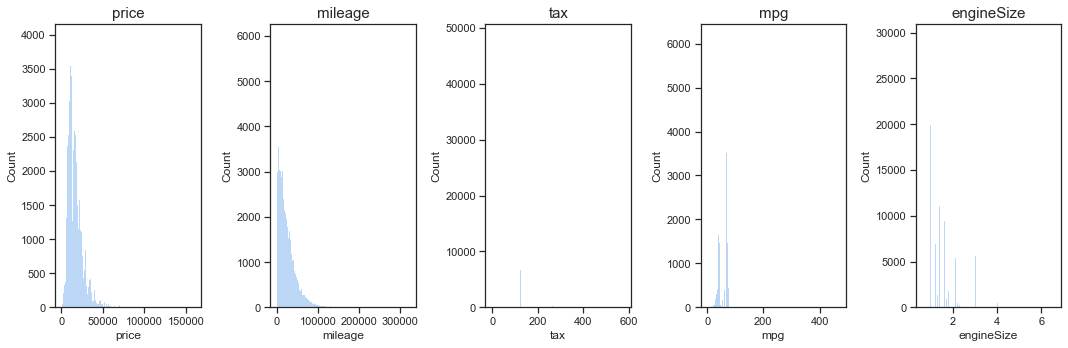

In [15]:
figure, axis = plt.subplots(1,5,figsize=(15,5))

for i in range(len(num_features)):
    axis[i].set_title(num_features[i], size=15)
    sns.histplot(ax=axis[i], data = df, x=num_features[i])

# auto padding subplot
plt.tight_layout()
plt.show()

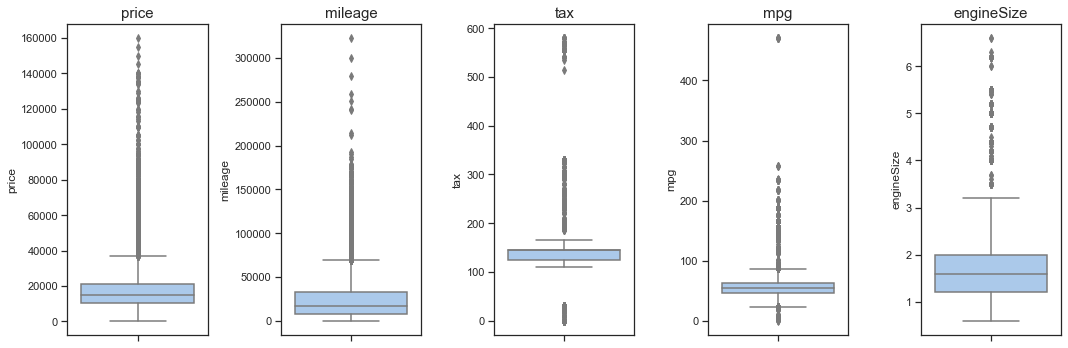

In [16]:
figure, axis = plt.subplots(1,5,figsize=(15,5))

for i in range(len(num_features)):
    axis[i].set_title(num_features[i], size=15)
    sns.boxplot(ax=axis[i], data = df, y=num_features[i])

# auto padding subplot
plt.tight_layout()
plt.show()

* berdasarkan histplot, sebaran data kelima feature cenderung *right-skew*.
* berdasarkan boxplot, sebaran data kelima feature memiliki banyak outlier di sebalah kanan.
* dapat disimpulkan persebaran data kelima data numerik tsb memiliki distribusi tidak normal.

## Correlation

In [17]:
df[num_features].corr(method='spearman')

,price,mileage,tax,mpg,engineSize
price,1.000000,-0.523813,0.318341,-0.393975,0.576650
mileage,-0.523813,1.000000,-0.263159,0.336281,0.103324
tax,0.318341,-0.263159,1.000000,-0.576038,0.165630
mpg,-0.393975,0.336281,-0.576038,1.000000,-0.207424
engineSize,0.576650,0.103324,0.165630,-0.207424,1.000000


1. semakin tinggi harga mobil tsb (price), semakin tinggi pula harga pajaknya (tax) -> korelasi positif medium
2. semakin rendah jarak yg telah ditempuh mobil tsb, semakin tinggi pula harga mobilnya (price)
3. semakin besar ukuran mesin mobil (engineSize), semakin tinggi pula harga pajaknya (tax) -> korelasi positif lemah

## Summary statistics on two variables

### Year vs Price

Hipotesis:

Ho: rata-rata harga mobil tiap tahun sama

Ha: rata-rata harga mobil tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana

In [51]:
years=list(df['year'].unique())

In [52]:
stats,pval = kruskal(*[df[df['year'] == i]['price'] for i in years])

print(stats)
print(pval)

#conclusion
if pval <= 0.05:
    print('Tolak Ho, dapat dikatakan rata-rata harga mobil tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.')
else:
    print('Terima Ho, dapat dikatakan rata-rata harga mobil tiap tahun sama.')

42087.9084265688
0.0
Tolak Ho, dapat dikatakan rata-rata harga mobil tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.


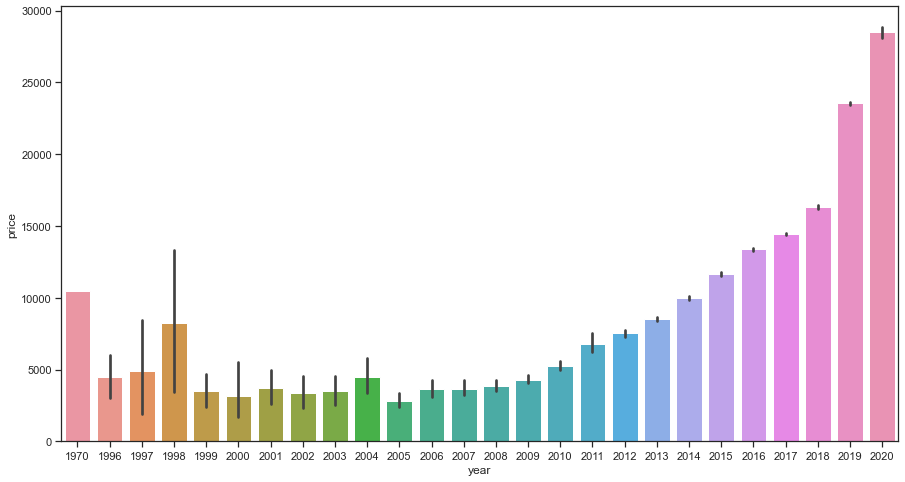

In [59]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='year', y='price')
plt.show()

>Rata-rata harga mobil bekas tiap tahunnya secara umum mengalami peningkatan harga. Dengan kata lain, semakin muda umur mobil bekas tersebut semakin tinggi pula rata-rata harga jualnya.

### Year vs Tax

Hipotesis:

Ho: rata-rata nilai pajak mobil tiap tahun sama

Ha: rata-rata nilai pajak mobil tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana

In [53]:
stats,pval = kruskal(*[df[df['year'] == i]['tax'] for i in years])

print(stats)
print(pval)

#conclusion
if pval <= 0.05:
    print('Tolak Ho, dapat dikatakan rata-rata nilai pajak tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.')
else:
    print('Terima Ho, dapat dikatakan rata-rata nilai pajak tiap tahun sama.')

24408.417976220502
0.0
Tolak Ho, dapat dikatakan rata-rata nilai pajak tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.


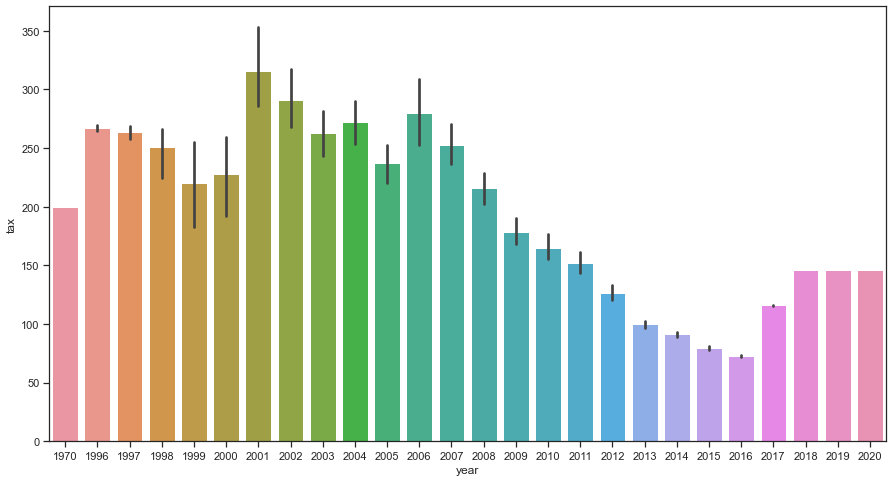

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='year', y='tax')
plt.show()

>Rata-rata nilai pajak mobil bekas pada tahun 2001 secara umum mulai menurun untuk tahun-tahun berikutnya dan mulai meningkat kembali pada tahun 2017.

<AxesSubplot:xlabel='year', ylabel='count'>

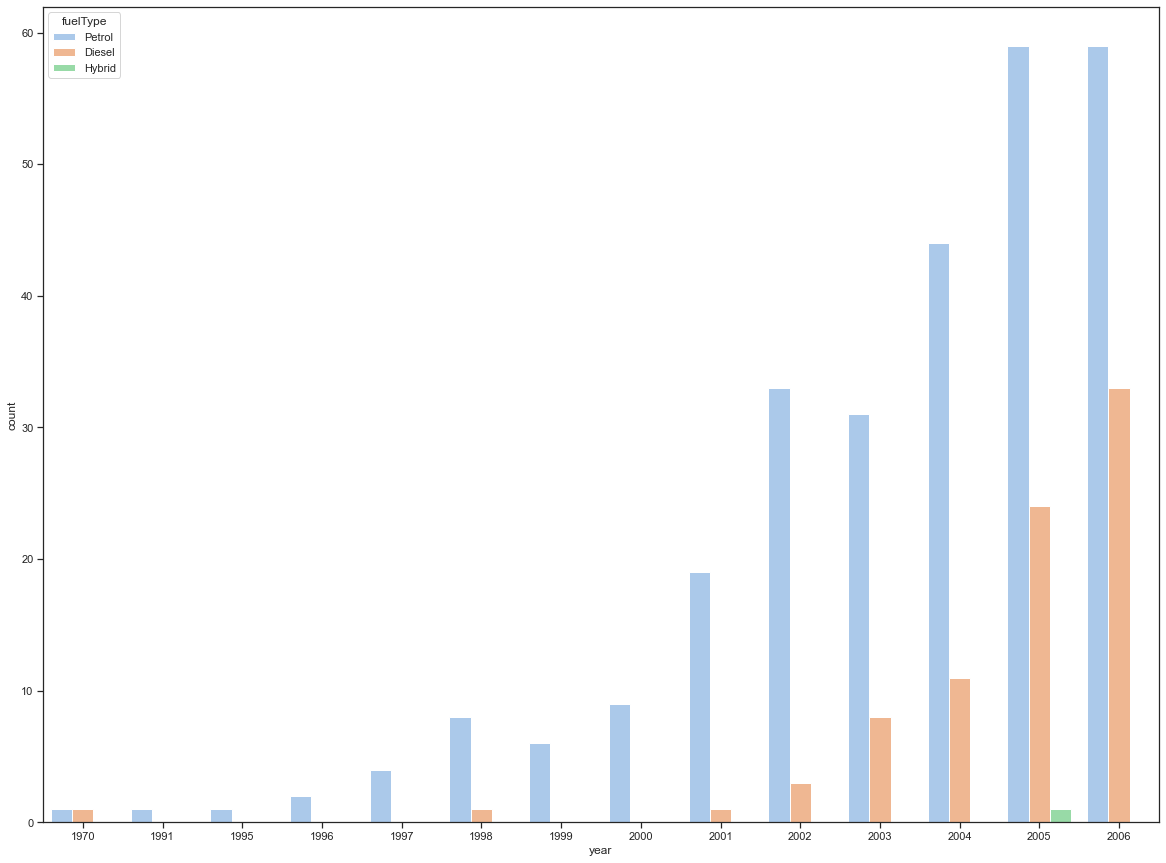

In [74]:
plt.figure(figsize=(20,15))
sns.countplot(x="year", hue="fuelType", data=df[df['year']<2007])

<AxesSubplot:xlabel='year', ylabel='count'>

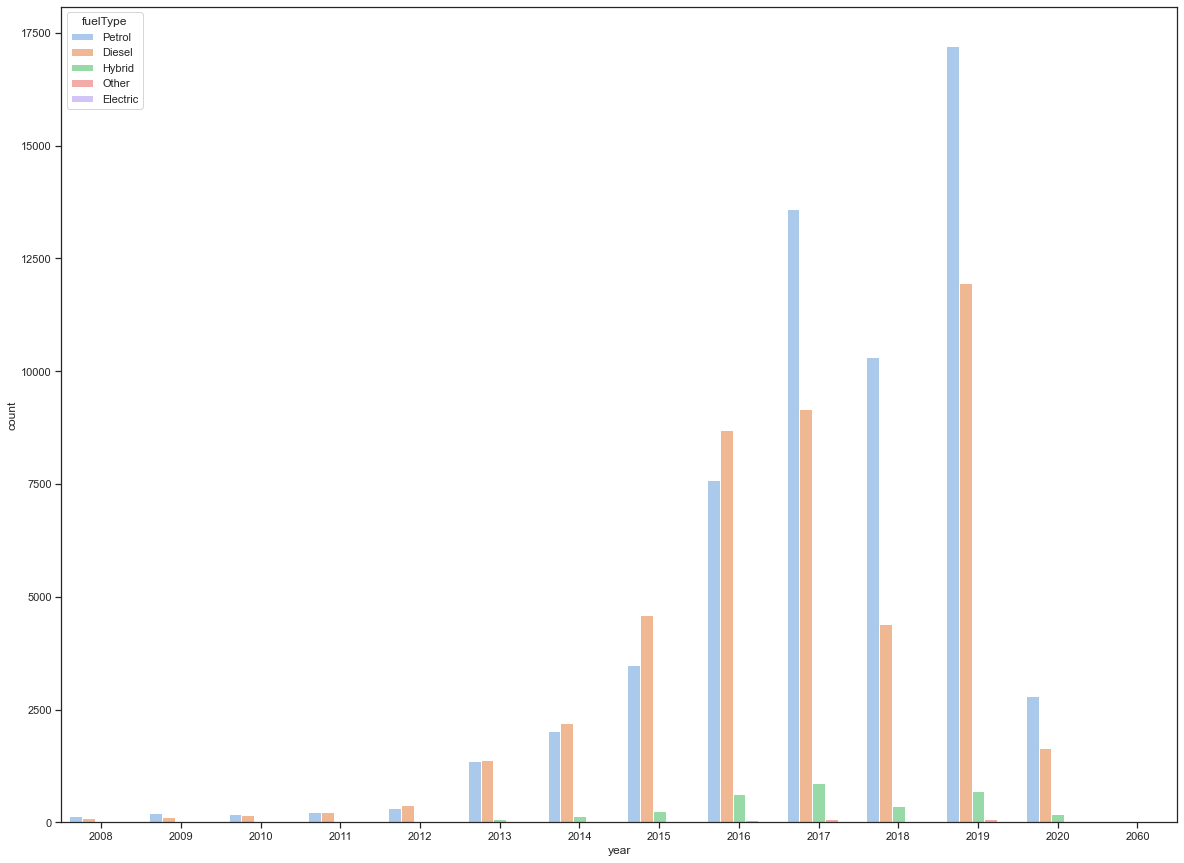

In [75]:
plt.figure(figsize=(20,15))
sns.countplot(x="year", hue="fuelType", data=df[df['year']>2007])

ref:
    
    https://www.moneysupermarket.com/car-insurance/petrol-vs-diesel/?__cf_chl_jschl_tk__=pmd_gyDQZeymIJ8ilTuI76rL9Flxin2tASMb5MaXlCu5JIE-1630055221-0-gqNtZGzNAjujcnBszQi9